#Assignment 1:
    test if the distribution of ages is the same for 
    
    1) male and female riders
    
    2) day and night riders
    
    use 3 tests: KS, Pearson's, Spearman's

Imports and setups

In [35]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
import os
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


I am reading in data from August 2013

In [36]:
df=pd.read_csv('2013-08_Citi Bike_day-night.csv')
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'sunrise', u'sunset',
       u'day or night', u'age'],
      dtype='object')


#BY GENDER
splitting data by gender and extracting the age happens in the cell below

In [37]:
#df is the dataframe where the content of the csv file is stored
df['birth year'] = df['birth year'].convert_objects(convert_numeric=True)
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,usertype,birth year,gender,sunrise,sunset,day or night,age,ageM,ageF
0,664,8/1/13 0:00,8/1/13 0:11,449,W 52 St & 9 Ave,40.764618,-73.987895,479,9 Ave & W 45 St,40.760193,...,20068,Subscriber,1944,1,6:07,19:51,night,71,71,NaN
1,2115,8/1/13 0:00,8/1/13 0:35,254,W 11 St & 6 Ave,40.735324,-73.998004,195,Liberty St & Broadway,40.709056,...,17095,Subscriber,1974,1,6:07,19:51,night,41,41,NaN
2,385,8/1/13 0:00,8/1/13 0:06,460,S 4 St & Wythe Ave,40.712859,-73.965903,2002,Wythe Ave & Metropolitan Ave,40.716887,...,18197,Customer,NaN,0,6:07,19:51,night,\N,NaN,NaN
3,653,8/1/13 0:00,8/1/13 0:11,398,Atlantic Ave & Furman St,40.691652,-73.999979,398,Atlantic Ave & Furman St,40.691652,...,17080,Customer,NaN,0,6:07,19:51,night,\N,NaN,NaN
4,954,8/1/13 0:00,8/1/13 0:16,319,Park Pl & Church St,40.713361,-74.009376,336,Sullivan St & Washington Sq,40.730477,...,17967,Customer,NaN,0,6:07,19:51,night,\N,NaN,NaN


lets splot age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. if i was to do this "for real" the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

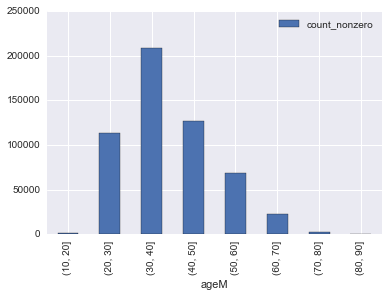

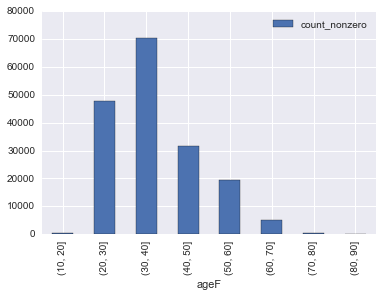

In [38]:
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 20]       0.000459
(20, 30]       0.063961
(30, 40]       0.081148
(40, 50]       0.029428
(50, 60]       0.014890
(60, 70]       0.002209
(70, 80]       0.000071
(80, 90]       0.000000


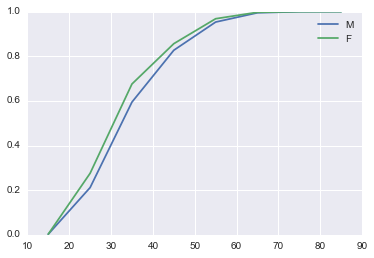

In [39]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

they look pretty darn similar! that sets my expectation for the tests to come. if i wanted to code the KS test by hand i woud have everything i need: the normalized cumulative distributions can be subtracted from each other and the max distance can be seeked. 

Notice that there amay be Nan values you are gonna have to deal with! you can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [40]:
import scipy.stats

#KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html


In [52]:
ks=scipy.stats.ks_2samp(df.ageM, df.ageF)
print ks

(0.42149592540193515, 0.0)


remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1+n2)}{n1n2}}$

where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

but scipy is already giving you the p-value, s you do not have to worry about it i am still giving you the table FWI and if you want to do the coding of the KS test by hand


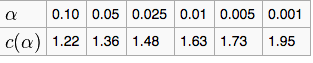

In [42]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="ksample.png")

In [49]:
##this cell is for you to tell me what the scipy KS test returned and what it mean

#In the test Kolmogorov Smirnov the hypothesis that we have to Contrast are:
# Ho=: The samples are drawn from the same distribution (in the two-sample case) 
# or that the sample is drawn from the reference distribution (in the one-sample case)
# H1=: The samples are not drawn from the same distribution, ...

#we have two ways for deciding to reject the null hypothesis 
#The first way is calculating DkS(n1,n2) and compare it with c(alpha)
#We have c(alpha)=c(.05)=1.36
 
n1 = len(df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)])
n2 = len(df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)])
print "The total number of sample 1 is: %s" % (n1)
print "The total number of sample 2 is: %s" % (n2)



The total number of sample 1 is: 545393
The total number of sample 2 is: 175371


In [77]:
c_alpha = 1.36
c_alphan1n2 = c_alpha * np.sqrt((n1 + n2) / (n1*n2))
print "The value of c(.05) is: %s" % (c_alpha)
print "The value of c_alphan1n2 is: %s" % (c_alphan1n2)
print "The value of KS is:"
print ks
ks1=ks[0]
print ks1
pvalue=ks[1]
print "P-value is: %s" % (pvalue)

The value of c(.05) is: 1.36
The value of c_alphan1n2 is: 0.0
The value of KS is:
(0.42149592540193515, 0.0)
0.421495925402
P-value is: 0.0


In [1]:

c_alpha = 1.36
def Results(ks1,c_alphan1n2):
    print 'Is the ks value {0:.2f} greater than the critical value {1:.2f}? '.format(ks1,c_alphan1n2)
    if ks1>c_alphan1n2:
        print "YES!"
    else: print "NO!"
    
    print 'Null hypothesis is {}'.format('rejected. The samples are not drawn from the same distribution.' if ks1>c_alphan1n2  else 'not rejected. The samples are drawn from the same distribution.') 
    
Results(ks1,c_alphan1n2)


NameError: name 'ks1' is not defined

In [83]:
#The second way is calculating is comparing the P-value with the significance level
#If P-value is smaller than the critical value, we reject H0.
a=.05
def Result(pvalue,a):
    print 'Is the p value {0:.2f} smaller than the critical value {1:.2f}? '.format(pvalue,a)
    if pvalue<a:
        print "YES!"
    else: print "NO!"
    
    print 'Null hypothesis is {}'.format( 'rejected. The samples are not drawn from the same distribution.' if pvalue<a  else 'not rejected') 

Result(pvalue,a)



Is the p value 0.00 smaller than the critical value 0.05? 
YES!
Null hypothesis is rejected. The samples are not drawn from the same distribution.


#Pearson's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [11]:
#please perform the Pearson's test and tell me what you find
dist1 = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero])
dist2 = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero])
dist1 = dist1.replace(np.NaN, 0)
dist2 = dist2.replace(np.NaN, 0)
#print type(dist1)
m1 = dist1.mean()
m2 = dist2.mean()
std1 = dist1.std()
std2 = dist2.std()
norm1 = (dist1 - m1)/std1
norm2 = (dist2 - m2)/std2
r, pv = scipy.stats.pearsonr(norm1, norm2)
print r, pv


<class 'pandas.core.frame.DataFrame'>
[ 0.97339316] [  5.23020668e-11]


R value is closer to 1 which means that we can reject Ho, and P-value is very low and close to zero, is less than our level of significance 5%. Then we have enough evidence to reject the Null Hypothesis.

#Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [31]:
#please perform the Spearman's test and tell me what you find
r2,pv2 = scipy.stats.spearmanr(dist1, dist2)
print r2
print pv2



0.992647058824
3.5782738227e-15


Also the Spearman tests shows that R value is closer to 1 which means that we can reject Ho, and P-value is very low and close to zero, is less than our level of significance 5%. Then we have enough evidence to reject the Null Hypothesis.

##please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??

##DO THE SAME FOR THE DISTRIBUTION OF RIDERS DURING THE DAY VS DURING THE NIGHT!

hint: remember how I converted the starttime last time in my own citibikes notebook into units that are easy to read. 
df['mystarttime'] = ...
then you can use something like
df['mystarttime'].dt.hour


Selecting days and nights

In [14]:
from datetime import datetime
df['date'] = pd.to_datetime(df['starttime'])
df['ageN'] = 2014 - df['birth year'][(df['usertype'] == 'Subscriber') & ((df['date'].dt.hour >=18) | (df['date'].dt.hour <6))]
df['ageD'] = 2014 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['date'].dt.hour <=18) & (df['date'].dt.hour >6)]




In [14]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,gender,sunrise,sunset,day or night,age,ageM,ageF,date,ageN,ageD
0,664,8/1/13 0:00,8/1/13 0:11,449,W 52 St & 9 Ave,40.764618,-73.987895,479,9 Ave & W 45 St,40.760193,...,1,6:07,19:51,night,71,71,NaN,2013-08-01,70,NaN
1,2115,8/1/13 0:00,8/1/13 0:35,254,W 11 St & 6 Ave,40.735324,-73.998004,195,Liberty St & Broadway,40.709056,...,1,6:07,19:51,night,41,41,NaN,2013-08-01,40,NaN
2,385,8/1/13 0:00,8/1/13 0:06,460,S 4 St & Wythe Ave,40.712859,-73.965903,2002,Wythe Ave & Metropolitan Ave,40.716887,...,0,6:07,19:51,night,\N,NaN,NaN,2013-08-01,NaN,NaN
3,653,8/1/13 0:00,8/1/13 0:11,398,Atlantic Ave & Furman St,40.691652,-73.999979,398,Atlantic Ave & Furman St,40.691652,...,0,6:07,19:51,night,\N,NaN,NaN,2013-08-01,NaN,NaN
4,954,8/1/13 0:00,8/1/13 0:16,319,Park Pl & Church St,40.713361,-74.009376,336,Sullivan St & Washington Sq,40.730477,...,0,6:07,19:51,night,\N,NaN,NaN,2013-08-01,NaN,NaN


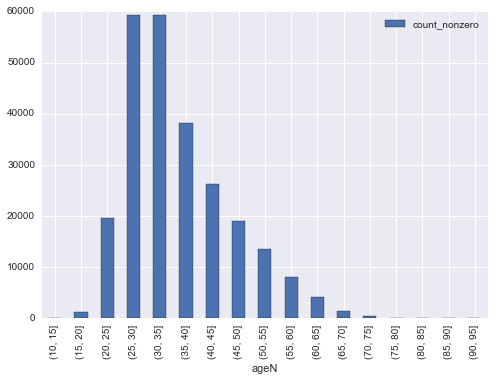

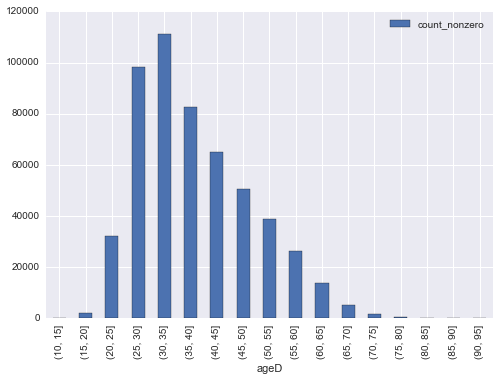

In [15]:
bins2 = np.arange(10, 99, 5)
df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageN                   
(10, 15]            NaN
(15, 20]       0.000363
(20, 25]       0.017576
(25, 30]       0.067824
(30, 35]       0.093961
(35, 40]       0.090089
(40, 45]       0.071577
(45, 50]       0.052219
(50, 55]       0.032910
(55, 60]       0.015577
(60, 65]       0.006211
(65, 70]       0.002006
(70, 75]       0.000485
(75, 80]       0.000073
(80, 85]       0.000028
(85, 90]       0.000013
(90, 95]       0.000000


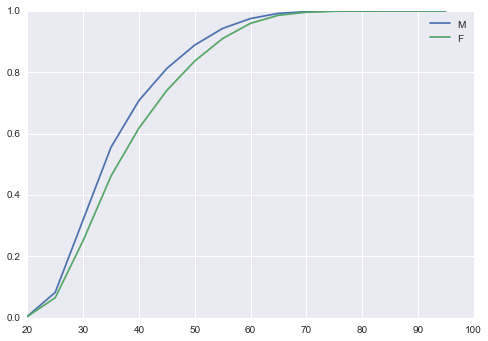

In [16]:
csM=df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).cumsum()

csF=df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()


In [36]:
#KSTest
ks2=scipy.stats.ks_2samp(df.ageN, df.ageD)
print ks2

(0.31590152618017536, 0.0)


-->Ho cant be rejected, The closer this number is to 0 the more likely it is that the two samples were drawn from the same distribution.

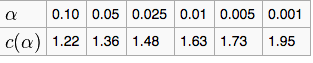

In [37]:
from IPython.display import Image
Image(filename="ksample.png")

In [40]:
#please perform the Pearson's test and tell me what you find
dist1 = df.ageN.groupby(pd.cut(df.ageN, bins2)).agg([count_nonzero])
dist2 = df.ageD.groupby(pd.cut(df.ageD, bins2)).agg([count_nonzero])
dist1 = dist1.replace(np.NaN, 0)
dist2 = dist2.replace(np.NaN, 0)
m1 = dist1.mean()
m2 = dist2.mean()
std3 = dist3.std()
std4 = dist4.std()
norm3 = (dist1 - m1)/std3
norm4 = (dist2 - m2)/std4
r3, pv3 = scipy.stats.pearsonr(norm3, norm4)
print r3, pv3


[ 0.979935] [  6.42078995e-12]


R value is closer to 1 which means that we can reject Ho, and P-value is very low and close to zero, is less than our level of significance 5%. Then we have enough evidence to reject the Null Hypothesis.

In [41]:
#please perform the Spearman's test and tell me what you find
rs, pvs = scipy.stats.spearmanr(dist1,dist2)
print rs, pvs

0.990196078431 3.07362545046e-14


Spearman tests shows that R value is closer to 1 which means that we can reject Ho, and P-value is very low and close to zero, is less than our level of significance 5%. Then we have enough evidence to reject the Null Hypothesis.

In [42]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF,ageN,ageD
count,877878.000000,877878.000000,877878.000000,877878.000000,877878.000000,877878.000000,877878.000000,877878.000000,720846.000000,877878.000000,545393.000000,175371.000000,251099.000000,528422.000000
mean,972.435594,440.795141,40.734086,-73.991229,440.992289,40.733711,-73.991254,17596.653068,1975.724041,1.020801,39.749357,37.803172,36.653834,38.904022
std,2327.694616,349.566577,0.020262,0.012658,354.240290,0.020350,0.012768,1699.188644,10.740551,0.615061,10.812672,10.369360,10.060052,10.908690
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1899.000000,0.000000,18.000000,18.000000,17.000000,17.000000
25%,438.000000,304.000000,40.719116,-74.001547,304.000000,40.719105,-74.001547,16125.000000,1969.000000,1.000000,31.000000,30.000000,29.000000,30.000000
50%,719.000000,402.000000,40.735877,-73.990931,402.000000,40.735354,-73.990931,17588.000000,1978.000000,1.000000,37.000000,35.000000,34.000000,37.000000
75%,1189.000000,484.000000,40.750200,-73.981948,482.000000,40.750020,-73.981948,19054.000000,1984.000000,1.000000,47.000000,44.000000,43.000000,46.000000
max,761793.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,20664.000000,1997.000000,2.000000,116.000000,116.000000,115.000000,115.000000


<Strong>The mean age for night riders is 37.3 and day riders is 39.7